# Apresentação das Técnicas de Classificação 1

## Base de Dados Sintética

In [51]:
from sklearn.datasets import make_classification

# Utiliza a função make_classification para gerar um conjunto de dados de classificação sintético.
# Os parâmetros controlam as características do conjunto de dados sintético gerado:
# - n_samples: O número total de amostras no conjunto de dados.
# - n_features: O número de características (ou atributos) em cada amostra.
# - n_classes: O número de classes no problema de classificação.
# - n_informative: O número de características informativas (ou relevantes) para a classificação.
# - n_clusters_per_class: O número de clusters por classe.
# - class_sep: A separação entre classes. Quanto maior o valor, mais separadas estão as classes.
# - random_state: Controla a reprodutibilidade dos dados gerados aleatoriamente, foi fixada a seed no valor 42
# Os dados gerados são atribuídos às variáveis X (contendo as características) e y (contendo os rótulos de classe)
X, y = make_classification(
    n_samples=1_000,
    n_features=10,
    n_classes=2,
    n_informative=2,
    n_clusters_per_class=2,
    class_sep=0.5,
    random_state=42,
    )

#Mostra a quantidade de linhas e colunas da tabela final
X.shape, y.shape

((1000, 10), (1000,))

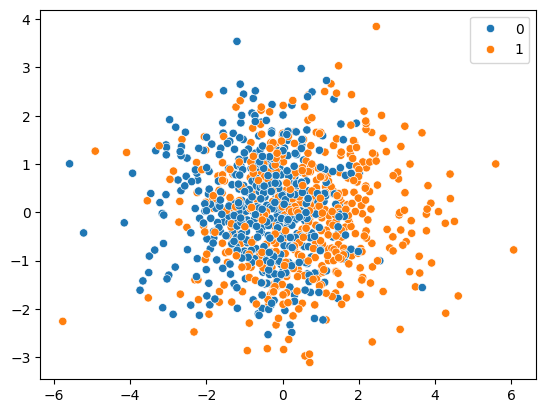

In [52]:
from sklearn.decomposition import PCA
import seaborn as sns

# Cria uma instância do PCA com 2 componentes principais.
# O parâmetro n_components define o número de componentes principais a serem mantidos.
# Neste caso, definimos n_components=2 para projetar os dados em um espaço bidimensional.
dec = PCA(n_components=2, random_state=42)

# Ajusta o modelo PCA aos dados de entrada X
dec.fit(X)

# Transforma os dados de entrada X para o espaço de componentes principais.
# Os dados transformados são atribuídos à variável Xd.
Xd = dec.transform(X)

# Cria um gráfico de dispersão (scatter plot) usando a biblioteca seaborn.
# Os valores das duas primeiras componentes principais (Xd[:,0] e Xd[:,1]) são usados como coordenadas x e y, respectivamente.
# A cor dos pontos no gráfico é determinada pelo vetor de rótulos de classe y.
g = sns.scatterplot(x=Xd[:,0],y=Xd[:,1],hue=y)

In [53]:
import pandas as pd

# Cria uma lista de nomes de colunas para o DataFrame.
# O número de colunas é determinado pelo número de features nos dados de entrada X.
# Cada nome de coluna é definido como 'col' seguido do índice da coluna mais 1
nome_atributos = [f'col{i+1}' for i in range(0,X.shape[1])]

# criando DataFrame com a Base de Dados
bd = pd.DataFrame(data=X, columns=nome_atributos)
#Adiciona a coluna tutor
bd['tutor'] = y
bd.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,tutor
0,0.950513,-0.066449,0.816279,-0.358079,0.997266,1.181890,-1.115679,-1.210161,-1.128077,1.227274,0
1,-0.902225,-0.566395,-0.838125,0.831617,-1.176962,1.820544,1.252375,-0.984534,0.863896,0.209470,1
2,-0.095198,-0.432774,-0.287160,0.793818,-0.268646,-1.836360,0.739086,-0.246383,-0.558145,-0.297376,1
3,1.326707,2.023606,1.323417,0.006800,-1.607661,0.184741,-2.119427,-0.357445,-0.973127,-0.190039,0
4,0.198979,-0.711303,0.143965,0.117124,1.536061,0.597538,-0.151355,-0.939156,-0.324085,0.236224,1


In [54]:
#Informações sobre os dados(tipo, quantidade, quantidade de não-nulos)
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1000 non-null   float64
 1   col2    1000 non-null   float64
 2   col3    1000 non-null   float64
 3   col4    1000 non-null   float64
 4   col5    1000 non-null   float64
 5   col6    1000 non-null   float64
 6   col7    1000 non-null   float64
 7   col8    1000 non-null   float64
 8   col9    1000 non-null   float64
 9   col10   1000 non-null   float64
 10  tutor   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [55]:
#Descrição estatística dos dados, transpondo a matriz resultante
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,0.029704,0.693659,-2.857531,-0.379822,0.033389,0.437461,2.808290
col2,1000.0,-0.015168,1.001338,-3.221016,-0.699467,-0.028277,0.691488,3.098299
col3,1000.0,0.021475,0.655861,-2.422365,-0.375888,0.076253,0.406711,2.453217
col4,1000.0,-0.027417,0.994598,-2.991136,-0.695500,-0.012086,0.672219,3.109919
col5,1000.0,-0.036508,1.037675,-3.007632,-0.721686,-0.055906,0.644151,3.152057
col6,1000.0,0.029886,0.986939,-2.832156,-0.623122,0.034297,0.667746,3.117681
col7,1000.0,-0.022545,1.099405,-4.043441,-0.718192,-0.146798,0.670385,3.520262
col8,1000.0,-0.082698,1.048987,-3.688365,-0.796008,-0.076948,0.603682,3.926238
col9,1000.0,-0.048433,1.009951,-3.580534,-0.674638,-0.165983,0.629048,3.494644
col10,1000.0,0.025112,1.002531,-3.019512,-0.660088,0.017219,0.693013,3.243093


### EDA - Análise de Dados Exploratória

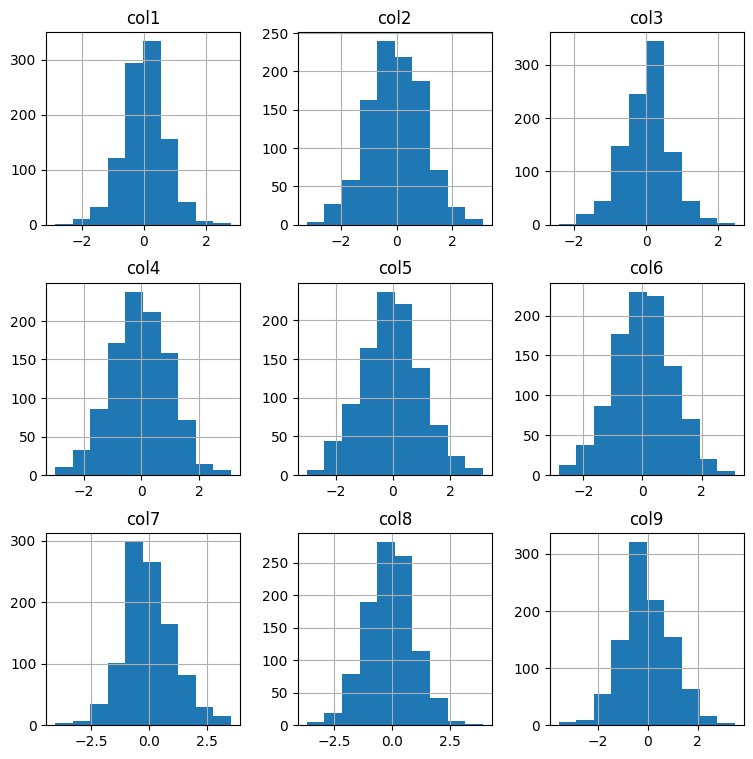

In [56]:
# Histograma das colunas
g = bd[bd.columns[:9]].hist(figsize=(9, 9))


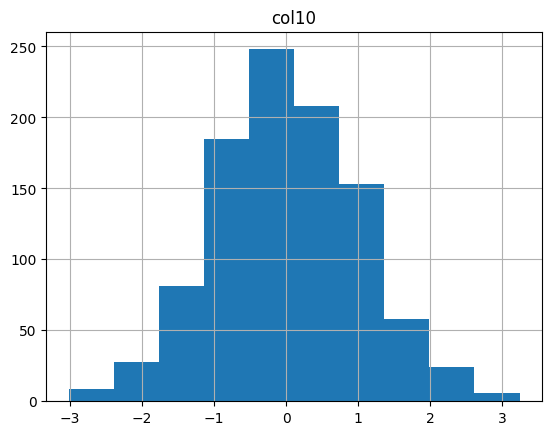

In [57]:
g = bd[bd.columns[9:-1]].hist()

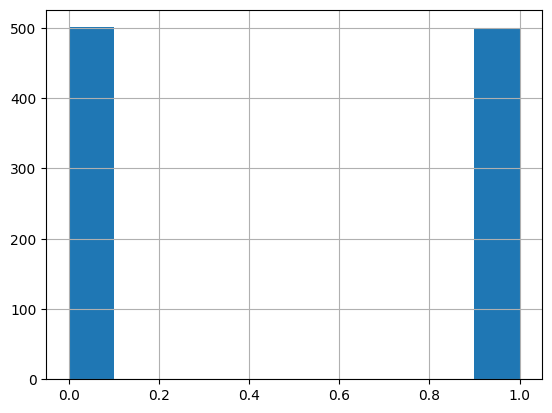

In [58]:
#Histograma da coluna de tutor
g = bd[bd.columns[-1]].hist()

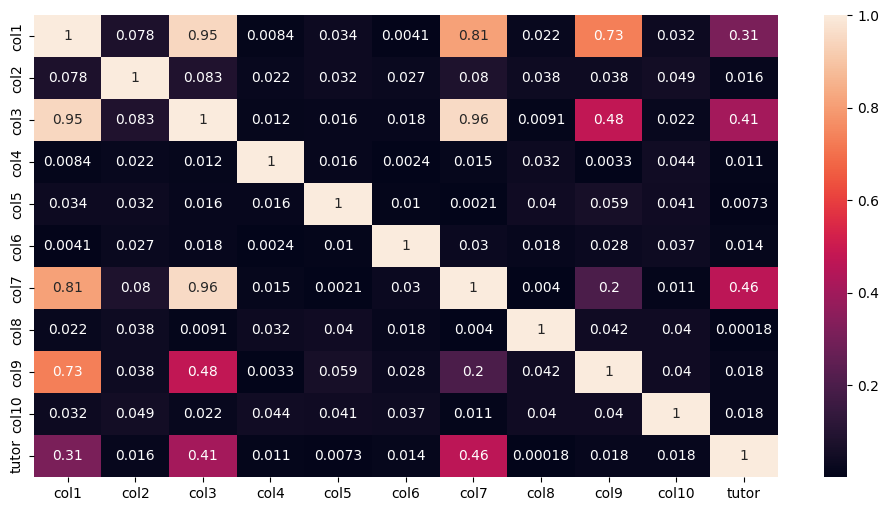

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

#Cria figura que será usada para dimensionar gráfico
plt.figure(figsize=(12,6))

#Gera gráfico de mapa de calor para mostrar correlação entre colunas
g = sns.heatmap(abs(bd.corr()),annot=True)

#Gera figura dimensionada
plt.show()

In [60]:
#Retira as colunas com alta correlação
X = bd.drop(['col1','col3','tutor'],axis=1).values

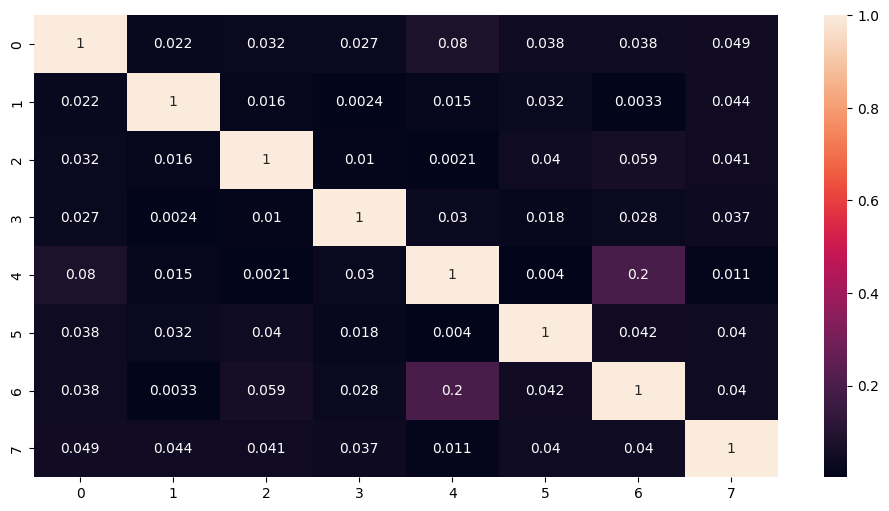

In [61]:
#Cria dataframe para verificar resultado
df_x = pd.DataFrame(X)

#Cria figura que será usada para dimensionar gráfico
plt.figure(figsize=(12,6))

#Gera gráfico de mapa de calor para mostrar correlação entre colunas
g = sns.heatmap(abs(df_x.corr()),annot=True)

#Gera figura dimensionada do resultado sem colunas correlacionadas
plt.show()

## Técnica de Aprendizado de Máquina Classificador

In [62]:
# Importa a classe GridSearchCV da biblioteca sklearn.model_selection.
from sklearn.model_selection import GridSearchCV

# Define uma função chamada avaliador que recebe uma lista de técnicas de aprendizado de máquina.
def avaliador(tecnicas:list):
    # Cria uma lista vazia para armazenar os resultados da avaliação.
    res = []

    # Para cada técnica na lista de técnicas fornecida como entrada.
    for t in tecnicas:
        # Obtém o nome da técnica.
        nome = t.__class__.__name__

        # Realiza a validação cruzada da técnica usando GridSearchCV com 5 folds de validação cruzada.
        cv = GridSearchCV(t, {}, cv=5)

        # Tenta treinar o modelo usando os dados de entrada X e os rótulos de classe y.
        try:
            cv.fit(X, y)

            # Obtém os resultados da validação cruzada para a técnica atual.
            # Extrai o tempo médio de treinamento (mean_fit_time) e a pontuação média de teste (mean_test_score).
            dn = {
                'nome': nome,
                'fit_time': cv.cv_results_['mean_fit_time'][0],
                'test_score': cv.cv_results_['mean_test_score'][0],
                'info':'-',
            }
        # Se ocorrer algum erro durante o treinamento, captura a exceção e registra a informação de erro.
        except Exception as e:
            dn = {'nome': nome, 'info': str(e)}

        # Adiciona o dicionário de resultados dn à lista de resultados res.
        res.append(dn)

    # Converte a lista de dicionários de resultados em um DataFrame pandas e retorna.
    return pd.DataFrame(res).sort_values('test_score',ascending=False)

https://scikit-learn.org/stable/modules/linear_model.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_logistic_001.png" />

In [63]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.dummy import DummyClassifier

#Aplica a função do avaliador para os modelos
avaliador([
    RidgeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    DummyClassifier(random_state=42),
])

,nome,fit_time,test_score,info
1,LogisticRegression,0.004551,0.737,-
0,RidgeClassifier,0.005056,0.735,-
2,DummyClassifier,0.000436,0.501,-


https://scikit-learn.org/stable/modules/lda_qda.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lda_qda_001.png" />

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Testa as duas abordagens apresentadas
avaliador([
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
])

,nome,fit_time,test_score,info
0,LinearDiscriminantAnalysis,0.002334,0.735,-
1,QuadraticDiscriminantAnalysis,0.001585,0.699,-


https://scikit-learn.org/stable/modules/gaussian_process.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_gpc_iris_001.png" />

In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

#Testa avaliador para o modelo
avaliador([GaussianProcessClassifier(kernel=(1.0 * RBF(1.0)), random_state=42)])

,nome,fit_time,test_score,info
0,GaussianProcessClassifier,9.827221,0.731,-


https://scikit-learn.org/stable/modules/naive_bayes.html

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*39U1Ln3tSdFqsfQy6ndxOA.png" />

In [66]:
from sklearn.naive_bayes import (BernoulliNB, ComplementNB,
                                 MultinomialNB, GaussianNB)

#Testa modelos NB
avaliador([
    BernoulliNB(),
    ComplementNB(),
    MultinomialNB(),
    GaussianNB(),
    ])

,nome,fit_time,test_score,info
0,BernoulliNB,0.002966,0.741,-
3,GaussianNB,0.001432,0.712,-
1,ComplementNB,NaN,NaN,\nAll the 5 fits failed.\nIt is very likely th...
2,MultinomialNB,NaN,NaN,\nAll the 5 fits failed.\nIt is very likely th...


https://scikit-learn.org/stable/modules/neighbors.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_002.png" />

In [67]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

#Testa modelos
avaliador([
    KNeighborsClassifier(),
    RadiusNeighborsClassifier(),
    NearestCentroid(),
])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 597, in predict
    probs = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 656, in predict_proba
    raise ValueError(
ValueError: No

,nome,fit_time,test_score,info
2,NearestCentroid,0.000851,0.739,-
0,KNeighborsClassifier,0.001892,0.691,-
1,RadiusNeighborsClassifier,0.001942,NaN,-


https://scikit-learn.org/stable/modules/neural_networks_supervised.html

<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width="30%" />

In [68]:
from sklearn.neural_network import MLPClassifier

#Testa modelos de redes neurais
avaliador([
    MLPClassifier(random_state=42, max_iter=800),
    MLPClassifier(hidden_layer_sizes=(40,20,) , random_state=42, max_iter=2000),
    MLPClassifier(hidden_layer_sizes=(64,32,8) , random_state=42, max_iter=2000),
    ])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

,nome,fit_time,test_score,info
0,MLPClassifier,4.802313,0.758,-
1,MLPClassifier,3.178276,0.752,-
2,MLPClassifier,3.720353,0.725,-


https://scikit-learn.org/stable/modules/svm.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" />

In [69]:
from sklearn.svm import LinearSVC, NuSVC, SVC

#Testando modelos classificadores com support vector machines
avaliador([
    LinearSVC(),
    NuSVC(),
    SVC(),
])

,nome,fit_time,test_score,info
0,LinearSVC,0.034866,0.735,-
2,SVC,0.024724,0.733,-
1,NuSVC,0.035710,0.700,-


https://scikit-learn.org/stable/modules/tree.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png" />

In [70]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

#Testando modelos com árvores de decisão
avaliador([
    DecisionTreeClassifier(random_state=42, max_depth=10),
    ExtraTreeClassifier(random_state=42, max_depth=20),
])

,nome,fit_time,test_score,info
0,DecisionTreeClassifier,0.006984,0.737,-
1,ExtraTreeClassifier,0.001635,0.618,-


https://scikit-learn.org/stable/modules/ensemble.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_forest_iris_001.png" />

In [71]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier,
                              ExtraTreesClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, HistGradientBoostingClassifier)

#Testa modelos
avaliador([
    AdaBoostClassifier(random_state=42, n_estimators = 200),
    BaggingClassifier(random_state=42, n_estimators = 100),
    ExtraTreesClassifier(random_state=42, n_estimators = 200),
    GradientBoostingClassifier(random_state=42,n_estimators = 200 ),
    RandomForestClassifier(random_state=42,n_estimators = 200),
    HistGradientBoostingClassifier(random_state=42, max_iter = 200),
])

,nome,fit_time,test_score,info
5,HistGradientBoostingClassifier,0.698035,0.799,-
1,BaggingClassifier,0.637993,0.796,-
4,RandomForestClassifier,0.811199,0.779,-
3,GradientBoostingClassifier,0.666158,0.778,-
2,ExtraTreesClassifier,0.347706,0.775,-
0,AdaBoostClassifier,0.662044,0.708,-


# Atividade

Realize as etapas da apresentação acima com esta nova base de dados

## Base de Dados Sintética

In [72]:
from sklearn.datasets import make_blobs

# Gera dados sintéticos usando make_blobs.
# Neste caso, cria 1000 amostras com 10 características e 2 centros
# O desvio padrão do cluster é definido como 10.
# O random_state é definido como 42 para garantir reproducibilidade.
X, y = make_blobs(
    n_samples=1000,
    n_features=10,
    centers=2,
    cluster_std=10.,
    random_state=42)

# Exibe a forma (shape) dos dados de entrada X e dos rótulos de classe y.
X.shape, y.shape

((1000, 10), (1000,))

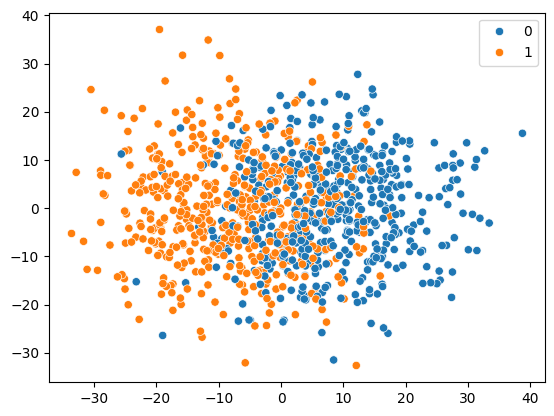

In [73]:
from sklearn.decomposition import PCA

# Cria uma instância da classe PCA com 2 componentes principais
dec = PCA(n_components=2, random_state=42)

# Ajusta o modelo PCA aos dados de entrada
dec.fit(X)

# Transforma os dados de entrada para o espaço de dimensão reduzida
Xd = dec.transform(X)

# Plota um gráfico de dispersão
# Os eixos x e y correspondem aos dois componentes principais após a redução de dimensionalidade
# A coloração dos pontos é determinada pelos rótulos de classe y
g = sns.scatterplot(x=Xd[:,0], y=Xd[:,1], hue=y)

In [74]:
import pandas as pd
# nome das colunas
nome_atributos = [f'col{i+1}' for i in range(0,X.shape[1])]
# criando DataFrame com a Base de Dados
bd = pd.DataFrame(data=X, columns=nome_atributos)
#Criando coluna tutor com valor de y
bd['tutor'] = y
bd.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,tutor
0,-6.378334,19.420559,22.251408,-25.269247,-19.517914,6.762531,-6.684049,-6.222079,-13.902709,-9.725584,1
1,1.903874,1.682724,6.929843,-16.605845,-0.847152,-3.898525,-2.451726,17.904706,5.698499,5.642346,0
2,8.378499,5.251279,4.828069,-9.743374,10.077602,12.092777,-7.271390,17.558829,3.775168,-9.205803,0
3,-6.526965,7.087602,-5.269894,13.682071,-13.960231,0.304554,6.680501,-5.057676,9.019026,3.466715,1
4,-5.403165,4.431687,15.879301,-1.692278,-14.505033,-17.983930,-18.518179,2.374546,4.363614,2.334240,1


In [75]:
#Informações gerais sobre os dados
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1000 non-null   float64
 1   col2    1000 non-null   float64
 2   col3    1000 non-null   float64
 3   col4    1000 non-null   float64
 4   col5    1000 non-null   float64
 5   col6    1000 non-null   float64
 6   col7    1000 non-null   float64
 7   col8    1000 non-null   float64
 8   col9    1000 non-null   float64
 9   col10   1000 non-null   float64
 10  tutor   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [76]:
#Dados estatísticos gerais do dataset
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,-6.081426,10.724960,-37.607426,-13.073280,-6.327867,1.158565,29.921732
col2,1000.0,9.245705,10.311675,-26.612654,1.983536,9.159029,16.103332,40.391771
col3,1000.0,5.409548,9.852061,-25.436445,-0.941425,5.650559,11.760995,40.422682
col4,1000.0,-1.506216,10.336331,-29.793868,-8.525805,-1.417739,5.732312,40.500485
col5,1000.0,-6.511587,10.063272,-45.587503,-12.856979,-6.511490,0.122852,23.888977
col6,1000.0,-6.281587,10.169504,-43.215563,-12.980665,-6.414441,0.449685,28.958642
col7,1000.0,-6.630188,10.083626,-41.251001,-13.729491,-6.615052,-0.059595,24.736965
col8,1000.0,3.478920,10.415622,-28.936287,-3.503590,3.652126,10.748015,33.340354
col9,1000.0,0.506609,10.231160,-32.746246,-6.026493,0.344864,7.498922,29.574478
col10,1000.0,-0.298833,11.277528,-34.621983,-8.137742,0.080570,7.379200,43.423829


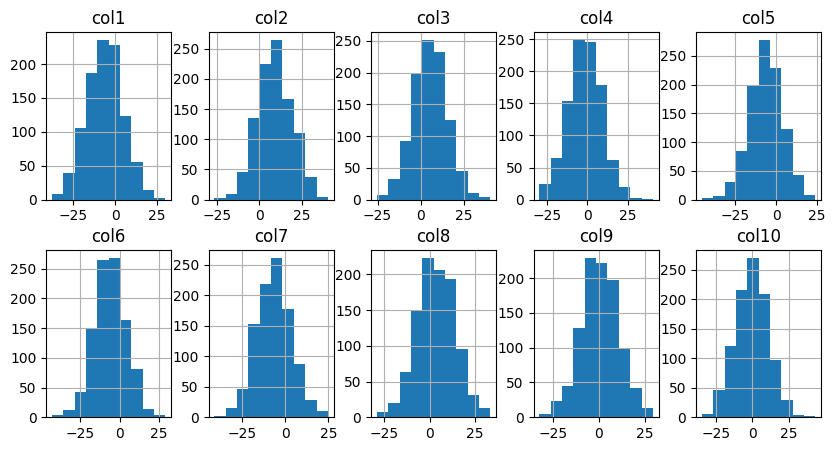

In [77]:
#Gera histogramas das colunas
g = bd[bd.columns[:-1]].hist(figsize=(10,5), layout =(2,5))

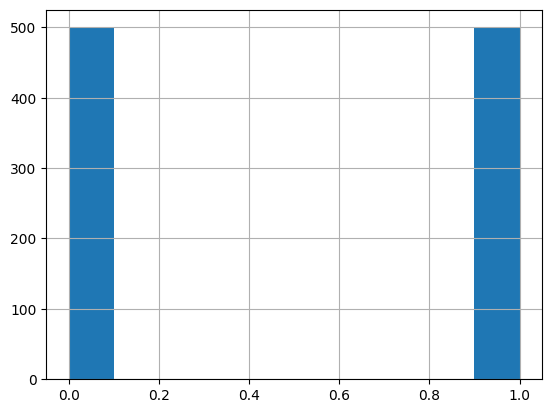

In [78]:
g = bd[bd.columns[-1]].hist()

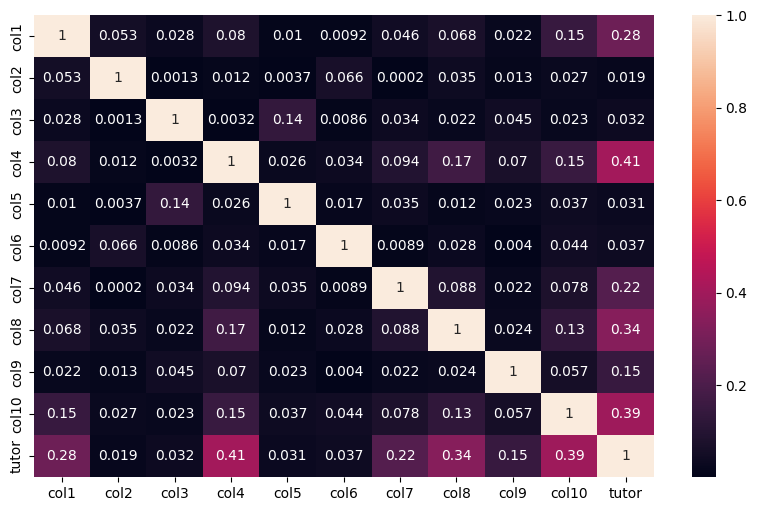

In [79]:
import seaborn as sns

plt.figure(figsize=(10,6))

#Plota um mapa de calor das colunas correlacionadas
g = sns.heatmap(abs(bd.corr()),annot=True)

plt.show()

In [82]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier,
                              ExtraTreesClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, HistGradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import (BernoulliNB, GaussianNB)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Vetor de técnicas englobando todas as abordadas anteriormente
tecnicas = [

    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    #GPC
    GaussianProcessClassifier(kernel=(1.0 * RBF(1.0)), random_state=42),

    #Naive Bayes
    BernoulliNB(),
    GaussianNB(),

    #Neighbors
    KNeighborsClassifier(),
    NearestCentroid(),

    #Neural Network
    MLPClassifier(hidden_layer_sizes=(128,64,32,16), random_state=42, max_iter=1000),

    #SVMs
    LinearSVC(max_iter=5000),
    NuSVC(),
    SVC(),

    #Dummy Classifier
    DummyClassifier(random_state=42),

    #Ridge
    RidgeClassifier(random_state=42),

    #Logistic Regression
    LogisticRegression(random_state=42),

    #Ensamble
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    HistGradientBoostingClassifier(random_state=42),
]

avaliador(tecnicas)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

,nome,fit_time,test_score,info
0,LinearDiscriminantAnalysis,0.002091,0.780,-
12,RidgeClassifier,0.002922,0.780,-
6,NearestCentroid,0.003398,0.776,-
13,LogisticRegression,0.008642,0.773,-
4,GaussianNB,0.008724,0.769,-
17,ExtraTreesClassifier,0.297627,0.768,-
8,LinearSVC,0.195145,0.764,-
1,QuadraticDiscriminantAnalysis,0.001592,0.764,-
10,SVC,0.020903,0.764,-
9,NuSVC,0.027219,0.760,-
